In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
filename = "TX Production - 1993.csv"
file = pd.read_csv(filename)

county_names = []
for j in file["County"]:
    county_names.append(j)

In [4]:
totalprod = []

for name in county_names:
    oil_list = []
    
    for year in np.arange(1993,2020): 
        filename = "TX Production - " + str(year) +".csv"
        production = pd.read_csv(filename)
        
        for (county,value) in zip(production["County"],production["Oil (Million BBL)"]):
            if name==county:
                oil_list.append(value)
    
    totalprod.append(oil_list)

0
0
0


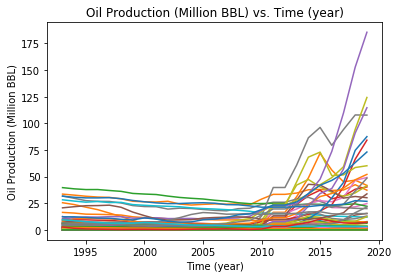

In [5]:
for i in np.arange(0,254):
    years = np.arange(1993,2020)
    prod = totalprod[i]
    plt.plot(years,prod, label=county_names[i])        
    plt.title("Oil Production (Million BBL) vs. Time (year)")
    plt.xlabel("Time (year)")
    plt.ylabel("Oil Production (Million BBL)")
    #plt.legend()

Text(0,0.5,'Oil Production (Million BBL)')

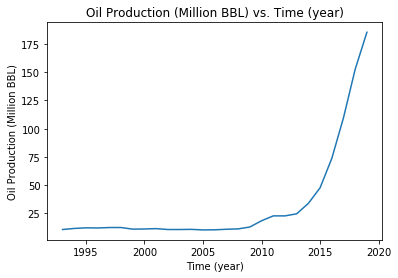

In [5]:
    years = np.arange(1993,2020)
    prod = totalprod[164]

    plt.plot(years,prod, label=county_names[164])
    plt.title("Oil Production (Million BBL) vs. Time (year)")
    plt.xlabel("Time (year)")
    plt.ylabel("Oil Production (Million BBL)")

-59.86098966204104 456.00824729627254


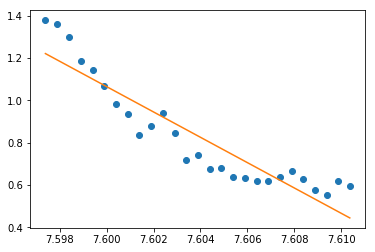

In [6]:
x = np.arange(1993,2020)
y = totalprod[0]

x_log = np.log(x)
y_log = np.log(y)

curve_fit = np.polyfit(x_log, y, 1)
print(curve_fit[0],curve_fit[1])

y_fit = curve_fit[0] * x_log + curve_fit[1]
plt.plot(x_log, y, "o")
plt.plot(x_log, y_fit)

C:\Users\gabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


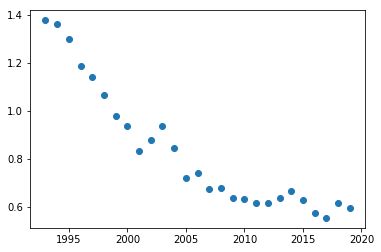

In [7]:
x = np.arange(1993,2020)
y = totalprod[0]

x_log = np.log(x)
y_log = np.log(y)

curve_fit = np.polyfit(x, y_log, 1)
#print(curve_fit)

y_fit = np.exp(curve_fit[0]) * np.exp(curve_fit[1]*x)
plt.plot(x, y, "o")
plt.plot(x, y_fit)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import math

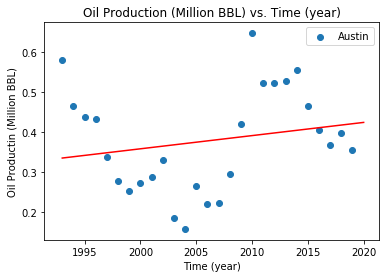

The equation of regression line is y=-30579.28e^(0.0x)+30573.07


In [9]:
#Y = A*e^Bx + C

i = 7

x = np.arange(1993,2020)
y = totalprod[i]

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, x, y, p0=[100, 1e-6, 10000], maxfev=1000)

x_plot=np.linspace(1993,2020,100)
plt.plot(x_plot, func(x_plot, *popt), 'r-')

plt.scatter(x,y,label=county_names[i])
plt.title("Oil Production (Million BBL) vs. Time (year)")
plt.xlabel("Time (year)")
plt.ylabel("Oil Productin (Million BBL)")
plt.legend()
plt.show()

a=popt[0].round(2)
b=popt[1].round(2)
c=popt[2].round(2)
print(f'The equation of regression line is y={a}e^({b}x)+{c}')

C:\Users\gabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\gabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


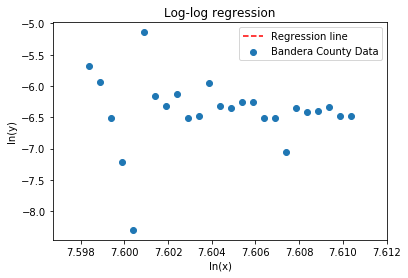

The equation of regression line is ln(y) = nan*ln(x) + nan


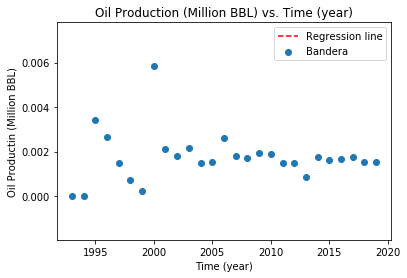

The equation of regression line is y = nan * x**nan


In [10]:
#y = A * x^B
#ln(y) = ln(A) + B*ln(x)

i = 9

x = np.arange(1993,2020)
y = totalprod[i]

p = np.polyfit(np.log(x), np.log(y), 1)
log_y_fit = p[0] * np.log(x) + p[1]
plt.plot(np.log(x), log_y_fit, 'r--', label='Regression line')
plt.scatter(np.log(x),np.log(y),label=county_names[i] + " County Data")
plt.title("Log-log regression")
plt.xlabel('ln(x)')
plt.ylabel('ln(y)')
plt.legend()
plt.show()
print(f'The equation of regression line is ln(y) = {p[0]:.3f}*ln(x) + {p[1]:.3f}')

y_fit = (math.exp(p[1]))*(x**p[0])
plt.plot(x,y_fit,'r--', label='Regression line')
plt.scatter(x,y,label=county_names[i])
plt.title("Oil Production (Million BBL) vs. Time (year)")
plt.xlabel("Time (year)")
plt.ylabel("Oil Productin (Million BBL)")
plt.legend()
plt.show()
print(f'The equation of regression line is y = {math.exp(p[1]):.3e} * x**{p[0]:.3f}')